# E-commerce — Выявление профилей потребления

**Задача**:

Сегментировать покупателей по профилю потребления

* Провеcти исследовательский анализ данных
* Сегментировать покупателей на основе истории их покупок Выяснить как сегментация может помочь в разработке более персонализированных предложений для покупателей и сформировать сегменты на основе того, что покупают пользователи. Проанализировать их покупки и сегментировать товары на основе принадлежности к той или иной товарной категории.
- Сформулировать и проверить статистические гипотезы

**Описание данных:**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Материалы" data-toc-modified-id="Материалы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Материалы</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-истории-покупок" data-toc-modified-id="Изучение-истории-покупок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение истории покупок</a></span><ul class="toc-item"><li><span><a href="#Общие-метрики:-общее-количество-покупателей,-общее-количество-товаров,-среднее-количество-заказов-на-одного-покупателя,-средний-чек,-среднее-количество-единиц-товара-при-одной-покупке." data-toc-modified-id="Общие-метрики:-общее-количество-покупателей,-общее-количество-товаров,-среднее-количество-заказов-на-одного-покупателя,-средний-чек,-среднее-количество-единиц-товара-при-одной-покупке.-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Общие метрики: общее количество покупателей, общее количество товаров, среднее количество заказов на одного покупателя, средний чек, среднее количество единиц товара при одной покупке.</a></span></li><li><span><a href="#Произвести-визуализацию-данных,-выделить-аномалии" data-toc-modified-id="Произвести-визуализацию-данных,-выделить-аномалии-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Произвести визуализацию данных, выделить аномалии</a></span></li></ul></li><li><span><a href="#Сегментация-покупателей" data-toc-modified-id="Сегментация-покупателей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сегментация покупателей</a></span><ul class="toc-item"><li><span><a href="#Разделение-всех-товаров-на-несколько-категорий" data-toc-modified-id="Разделение-всех-товаров-на-несколько-категорий-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Разделение всех товаров на несколько категорий</a></span></li></ul></li><li><span><a href="#Кластеризация-методом-K-Means" data-toc-modified-id="Кластеризация-методом-K-Means-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Кластеризация методом K-Means</a></span><ul class="toc-item"><li><span><a href="#Провеcти-кластеризацию-клиентов" data-toc-modified-id="Провеcти-кластеризацию-клиентов-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Провеcти кластеризацию клиентов</a></span></li><li><span><a href="#Сравнить-поведение-покупателей-из-разных-кластеров-после-сегментации" data-toc-modified-id="Сравнить-поведение-покупателей-из-разных-кластеров-после-сегментации-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Сравнить поведение покупателей из разных кластеров после сегментации</a></span></li></ul></li><li><span><a href="#TF-IDF-эксперимент" data-toc-modified-id="TF-IDF-эксперимент-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>TF-IDF эксперимент</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Материалы

**Презентация:**

https://disk.yandex.ru/i/GUbUP-8oBBifCg

**Дашборд:**

https://public.tableau.com/app/profile/kseniya.vishnevskaya/viz/final_project2_16220980161680/Dashboard  
    

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

import nltk
from nltk.corpus import stopwords
import string

import re

import itertools

import numpy as np

import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

import pymorphy2

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()

import plotly.express as px
import plotly.graph_objects as go
import plotly

import datetime as dt

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

import warnings

warnings.simplefilter('ignore') 

import plotly.io as pio
pio.renderers.default='notebook'

from IPython.display import Image

In [2]:
RANDOM_SEED = 0

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Предобработка данных

* Исследовать данные на наличие пропущенных значений;
* Исследовать соответствие типов, привести к нужным типам, понизить разрядность, где необходимо, для оптимизации работы кода;
* Исследовать дубликаты и удалить их, если необходимо;

In [4]:
df = pd.read_csv('../datasets/ecommerce_dataset.csv')

In [5]:
display(pd.concat([df.sample(5, random_state=RANDOM_SEED)]).reset_index(drop=True))

date                           customer_id  order_id                                                            product  quantity  price
0  2019042913  603e92a4-fc7f-4203-9ca5-103da5b008ac     14705  Рассада Остеоспермум крупноцветковый Purple малиновый объем 0,5 л         1  127.0
1  2019060216  1d6c8c1f-a799-4418-9af2-1ded47d7a85c     14833                      Рассада Кабачка сорт Аэронавт, кассета по 6шт         1  120.0
2  2019012314  8fa1ee5d-7955-4ad6-8ce0-fd27033e991a     69944          Емкость для соуса с ложкой PASABAHCE 200 мл OTS131505-000        15  101.0
3  2019052818  63d48b37-11ca-46ec-b858-26cc165f7629     14825        Петуния простая рассада однолетних цветов в кассете по 6 шт         2  128.0
4  2019051718  b6095dc9-1580-4d1f-8ba3-a554a8dab3bd     14789                     Рассада Дыни сорт Колхозница горшок 9х9 см P-9         4   38.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Данные содержат 6737 строк и 6 столбцов. Пропущенных значений не обнаружено.

Видим, что можем понизить разрядность разрядность столбцов для оптимизации работы кода. Также необходимо привести данные к нужным типам и привести столбец `product` к нижнему регистру.

In [7]:
signed_features = df.select_dtypes(include='int64').columns
float_features = df.select_dtypes(include='float64').columns

df[float_features] = df[float_features].apply(pd.to_numeric, downcast='float')
df[signed_features] = df[signed_features].apply(pd.to_numeric, downcast='signed')

df['product']=df['product'].str.lower()

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df['date'] = df['date'].astype('datetime64[D]') 

In [9]:
display(df.describe().T)
display(df.describe(include = ['object']).T)

count          mean           std      min      25%      50%      75%      max
order_id  6737.0  43128.948345  27899.414662  12624.0  14827.0  68503.0  70504.0  73164.0
quantity  6737.0      2.501559     15.266478      1.0      1.0      1.0      1.0   1000.0
price     6737.0    462.028503    871.296082      9.0    101.0    135.0    398.0  14917.0

count unique                                         top freq
customer_id  6737   2451        1d6c8c1f-a799-4418-9af2-1ded47d7a85c  888
product      6737   2341  рассада кабачка сорт зебра кассета 6 шт e6   79

Минимальное количество купленных товаров одним клиентом  - 1 шт., а максимальное - 1000 единиц продукции на одного покупателя за весь рассматриваемый промежуток времени. Минимальная цена за товар - 9 у.е., максимальная - 14 917.
Наибольшей популярностью пользуется товар "рассада кабачка сорт зебра кассета 6 шт e6", его купили 79 раз за рассматриваемый период.

In [10]:
print('Рассматриваемый период: с', df['date'].min().date(), "по" , df['date'].max().date())

Рассматриваемый период: с 2018-10-01 по 2019-10-31


В нашем датасете представлены данные с 01.10.2018 по 31.10.2019.

In [11]:
print('Количество дубликатов: {:.0f}'.format(df.duplicated().sum()))

Количество дубликатов: 966


In [12]:
df = df.drop_duplicates()

## Исследовательский анализ данных

### Изучение истории покупок

#### Общие метрики: общее количество покупателей, общее количество товаров, среднее количество заказов на одного покупателя, средний чек, среднее количество единиц товара при одной покупке.

In [13]:
print('Общее количество уникальных покупателей: {:.0f}'.format(len(df['customer_id'].unique())))
print('Общее количество уникальных товаров: {:.0f}'.format(len(df['product'].unique())))
print('Количество уникальных заказов: {:.0f}'.format(len(df['order_id'].unique())))


Общее количество уникальных покупателей: 2451
Общее количество уникальных товаров: 2341
Количество уникальных заказов: 2784


In [14]:
orders_per_buyer = df.groupby('customer_id').agg({'order_id':'count'})

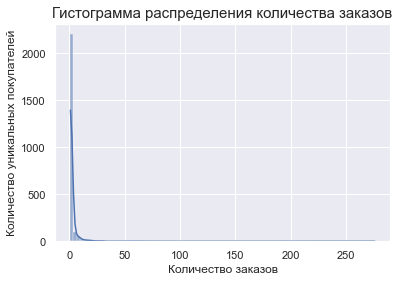

In [15]:
plt.title('Гистограмма распределения количества заказов', size = 15)
sns.histplot(data = orders_per_buyer, x='order_id', kde=True, bins=100)
plt.xlabel('Количество заказов')
plt.ylabel('Количество уникальных покупателей')
plt.show()

Видим, что распределение количества заказов далеко от нормального, поэтому будем использовать как меру медиану.

In [16]:
print('Cреднее количество заказов на одного покупателя: {:.0f} шт.'.format(orders_per_buyer['order_id'].median()))

Cреднее количество заказов на одного покупателя: 1 шт.


In [17]:
df['total_price'] = df['quantity'] * df['price']
df['month'] = df['date'].astype('datetime64[M]') 

In [18]:
grouped_by_orders = df.groupby(['customer_id', 'order_id'])\
.agg({'date':'first', 'product':'count', 'quantity':'sum','price':'mean', 'total_price':'sum'}).reset_index()\
.rename(columns={'date':'first_date_order', 'product':'cnt_unique_products_in_order', 
                 'quantity':'total_cnt_goods_in_order', 'price':'avg_product_price', 'total_price':'order_price'})

grouped_by_customers = grouped_by_orders.groupby('customer_id')\
.agg({'order_id':'nunique', 'cnt_unique_products_in_order':'mean', 'total_cnt_goods_in_order':'mean', 
      'avg_product_price':'mean', 'order_price':['sum','mean']}).reset_index()

grouped_by_customers.columns = ['customer_id', 'cnt_orders', 'avg_products_in_order', 'avg_goods_in_order', 
                                'avg_product_price', 'total_revenue', 'avg_order_price']

In [19]:
print('Cредняя выручка с одного покупателя: {:.0f} у.е.'.format(grouped_by_customers['total_revenue'].median()))
print('Cредняя сумма заказа: {:.0f} у.е.'.format(grouped_by_customers['avg_order_price'].median()))
print('Cреднее число позиций товаров в заказах: {:.0f} шт.'.format(grouped_by_customers['avg_products_in_order'].median()))
print('Cреднее число единиц товаров в заказах: {:.0f} шт.'.format(grouped_by_customers['avg_goods_in_order'].median()))

Cредняя выручка с одного покупателя: 734 у.е.
Cредняя сумма заказа: 712 у.е.
Cреднее число позиций товаров в заказах: 1 шт.
Cреднее число единиц товаров в заказах: 1 шт.


In [20]:
grouped_by_customers.describe().T

count         mean           std   min    25%    50%     75%       max
cnt_orders             2451.0     1.149327      2.655249   1.0    1.0    1.0     1.0     126.0
avg_products_in_order  2451.0     2.101384      7.218433   1.0    1.0    1.0     1.0     276.0
avg_goods_in_order     2451.0     5.699664     28.376683   1.0    1.0    1.0     3.0    1000.0
avg_product_price      2451.0   774.151978   1152.935913  14.0  134.0  340.5   974.0   14917.0
total_revenue          2451.0  1865.578491  14399.594727  14.0  312.0  734.0  1649.0  675000.0
avg_order_price        2451.0  1671.012817  13924.354492  14.0  299.0  712.0  1574.0  675000.0

In [21]:
print('Средний чек по всем покупателям: {:.0f} у.е.'\
      .format((grouped_by_customers['total_revenue']/grouped_by_customers['cnt_orders']).median()))

Средний чек по всем покупателям: 712 у.е.


За рассматриваемый период времени в данных превалируют покупатели, совершившие разовые покупки. В заказах в основном наблюдаются 1-3 покупки. Cредняя выручка с одного покупателя составляет 734 у.е., а средняя сумма заказа - 712 у.е. Средний чек по всем покупателям составляет 712 у.е.

#### Произвести визуализацию данных, выделить аномалии

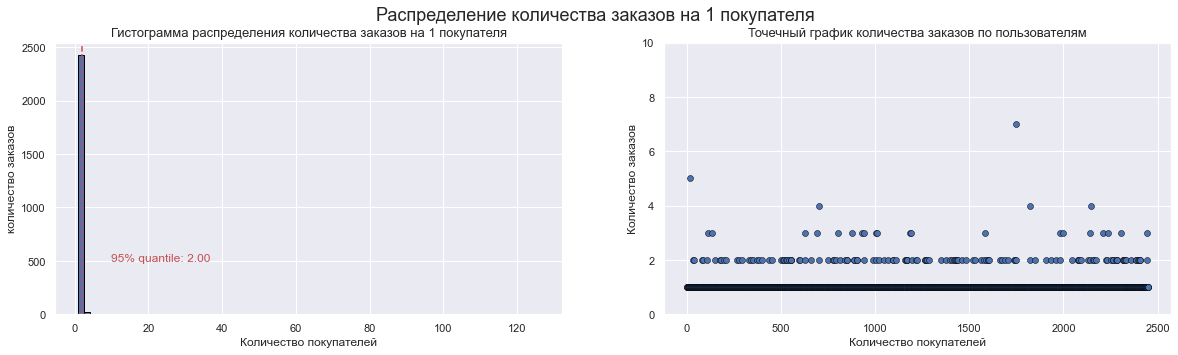

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Распределение количества заказов на 1 покупателя', size=18)

#Построение гистограммы
grouped_by_customers['cnt_orders'].hist(bins=80, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения количества заказов на 1 покупателя', size=13)
axs[0].set_xlabel('Количество покупателей')
axs[0].set_ylabel('количество заказов')
axs[0].axvline(x=grouped_by_customers['cnt_orders'].quantile(.95), c='r', linestyle='--')
axs[0].text(s='95% quantile: {:.2f}'.format(grouped_by_customers['cnt_orders'].quantile(.95)), 
          x=10, y=500, size=12, color='r')

x_values = pd.Series(range(0,len(grouped_by_customers)))
sns.scatterplot(x=x_values, y=grouped_by_customers['cnt_orders'], edgecolor='black')
axs[1].set_title('Точечный график количества заказов по пользователям', size=13)
axs[1].set_xlabel('Количество покупателей')
axs[1].set_ylabel('Количество заказов')
axs[1].set_ylim(0, 10)

plt.show()


На графиках видим наличие выбросов в распределении количества заказов на одного покупателя. В основном клиенты совершают до двух покупок, оставльное - выбросы. 95% квантиль равен 2 покупкам.

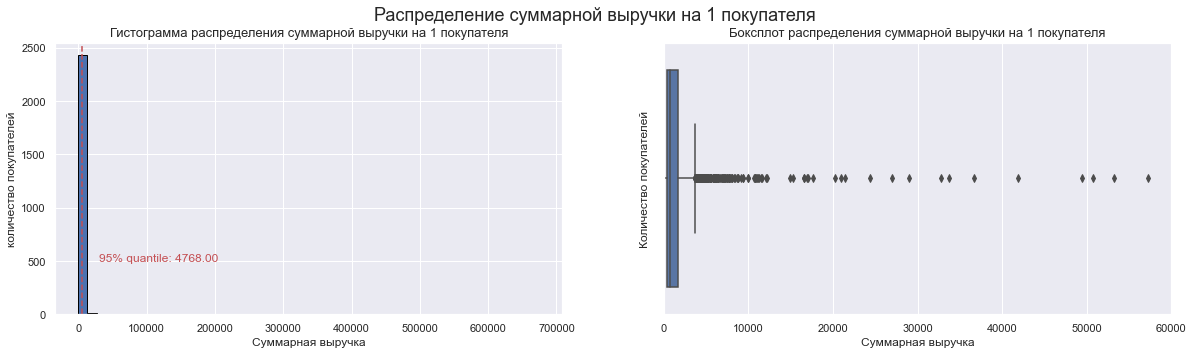

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Распределение суммарной выручки на 1 покупателя', size=18)

#Построение гистограммы
grouped_by_customers['total_revenue'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения суммарной выручки на 1 покупателя', size=13)
axs[0].set_xlabel('Суммарная выручка')
axs[0].set_ylabel('количество покупателей')
axs[0].axvline(x=grouped_by_customers['total_revenue'].quantile(.95), c='r', linestyle='--')
axs[0].text(s='95% quantile: {:.2f}'.format(grouped_by_customers['total_revenue'].quantile(.95)), 
          x=30000, y=500, size=12, color='r')

# Построение боксплота
sns.boxplot(x='total_revenue', data=grouped_by_customers, ax=axs[1])
axs[1].set_title('Боксплот распределения суммарной выручки на 1 покупателя', size=13)
axs[1].set_xlabel('Суммарная выручка')
axs[1].set_ylabel('Количество покупателей')
axs[1].set_xlim(0, 60000)

plt.show()


На графиках видим наличие выбросов в распределении количества суммарной выручки с одного покупателя. В основном клиенты покупают товары на сумму до 4768 у.е., остальное - выбросы. 95% квантиль равен 4768 у.е.

In [24]:
print('90, 95 и 99 перцентили количества заказов:', np.percentile(grouped_by_customers['cnt_orders'], [90, 95, 99]))

90, 95 и 99 перцентили количества заказов: [1. 2. 3.]


Не более 5% пользователей совершили больше двух заказов и не более 1% больше трех заказов. Пусть граница аномальных значений проходит в диапазоне свыше 3 х покупок.


In [25]:
print('90, 95 и 99 перцентили количества заказов:', np.percentile(grouped_by_customers['total_revenue'], [90, 95, 99]))

90, 95 и 99 перцентили количества заказов: [ 3200.   4768.  12122.5]


Не более 5% пользователей совершили покупки дороже 4768 у.е. и не более 1% дороже 12122.5 у.е. Пусть граница аномальных значений проходит в диапазоне свыше 12122.5 у.е.

In [26]:
abnormal_orders_users = grouped_by_customers[grouped_by_customers['cnt_orders']>np.percentile(grouped_by_customers['cnt_orders'], 99)].index.to_list()
abnormal_revenue_users = grouped_by_customers[grouped_by_customers['total_revenue']>np.percentile(grouped_by_customers['total_revenue'], 99)].index.to_list()
abnormal_users = pd.concat([pd.Series(abnormal_orders_users), pd.Series(abnormal_revenue_users)]).to_list()

In [27]:
print('Количество покупателей с аномально большой выручкой: {}'.format(len(abnormal_revenue_users)))
print('Количество покупателей с аномально большим количеством заказов: {}'.format(len(abnormal_orders_users)))

Количество покупателей с аномально большой выручкой: 25
Количество покупателей с аномально большим количеством заказов: 8


In [28]:
#Отфильтруем датафрейм по аномальным пользователям
grouped_by_customers_filtered = grouped_by_customers.loc[~(grouped_by_customers['total_revenue'] > 12122.5),:]
df_filtered = df[df['customer_id'].isin(grouped_by_customers_filtered['customer_id'])]
ordersByUsers_filtered = grouped_by_customers[grouped_by_customers['cnt_orders'] <= 3]
df_filtered = df_filtered[df_filtered['customer_id'].isin(ordersByUsers_filtered['customer_id'])]

Построим графики помесячной динамики выручки и количества покупателей по очищенным данным.

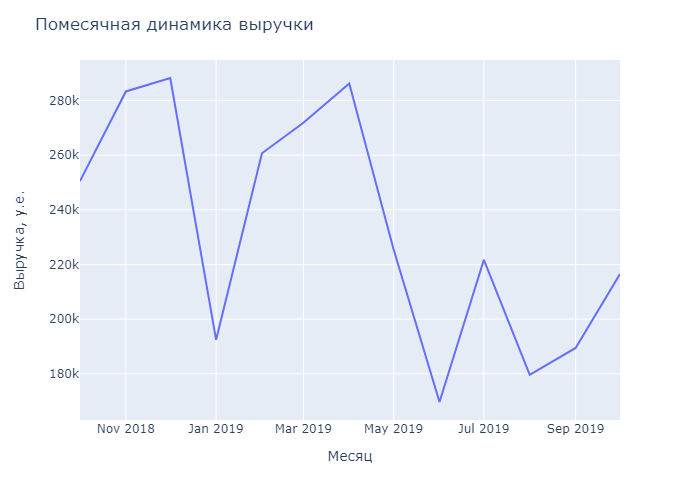

In [29]:
grouped_by_date = df_filtered.groupby('month').agg({'customer_id':'nunique', 'total_price':'sum'}).reset_index()\
.rename(columns={'customer_id':'cnt_buyers', 'total_price':'revenue'})
fig = px.line(grouped_by_date, x="month", y="revenue")
fig.update_layout(
    title='Помесячная динамика выручки',
    xaxis_title='Месяц',
    yaxis_title='Выручка, у.е.')
fig.show()

fig.write_image("images/line1.png")
img_bytes = fig.to_image(format="png")
Image(img_bytes) 

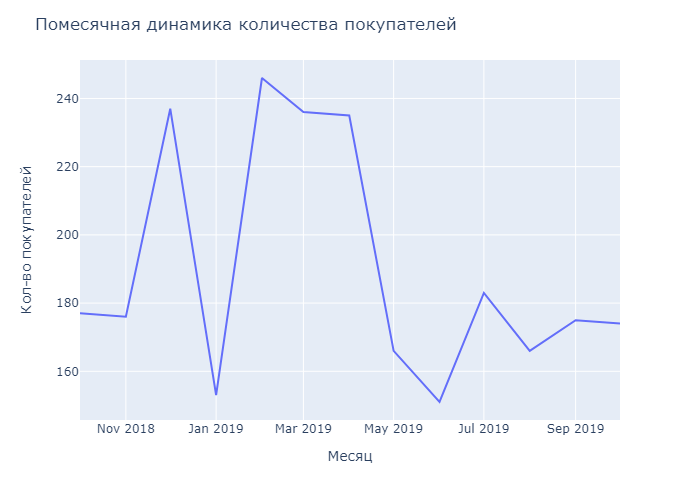

In [30]:
fig = px.line(grouped_by_date, x="month", y="cnt_buyers")
fig.update_layout(
    title='Помесячная динамика количества покупателей',
    xaxis_title='Месяц',
    yaxis_title='Кол-во покупателей')
fig.show()

fig.write_image("images/line2.png")
img_bytes = fig.to_image(format="png")
Image(img_bytes) 

Пиковые точки выручки приходится на ноябрь 2018 -283 тыс. у.е., декабрь 2018 - 288 тыс. у.е. и апрель 2019 года - 286 тыс. у.е. Выраженной сезонности не наблюдается. То же касается и динамики количества покупателей по месяцам. Пиковые точки - декабрь 2018 (237 уникальных покупателей), февраль 2019 (246 уникальных покупателей)  и апрель 2019 (235 уникальных покупателей). Видим, что количество покупателей сильно варьируется от месяца к месяцу.

### Сегментация покупателей

#### Разделение всех товаров на несколько категорий

* Выделить леммы в названиях товаров и разбить все товары на несколько категорий
* Провести исследование получившихся категорий: наиболее продаваемые категории товаров, суммарная выручка по каждой категории, количество проданных товаров в каждой категории
* Построить графики суммарной выручки по дням для каждой категории товаров

In [31]:
#Выделение лемм в названиях товаров
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")

morph = pymorphy2.MorphAnalyzer()
def lemmatize(doc):
    '''
    lemmatize - функция для лемматизации и исключения стоп-слов из рассмотрения
    '''
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

Применяем функцию для лемматизации к столбцу `product`.

In [32]:
df['product_word'] = df['product'].apply(lemmatize)

In [33]:
df['product_word'] = df['product_word'].astype(str)
# Убираем все пунктационные символы в наименовании товаров
df['product_word'] = df['product_word'].str.replace('[{}]'.format(string.punctuation), '', regex=True)

### Кластеризация методом K-Means

Сформируем дамми-переменные для дальнейшего подсчета наиболее часто встречающихся слов.

In [34]:
dummy_df = df['product_word'].str.get_dummies(sep=' ')

Выделим все слова с символами больше 3.

In [35]:
important_words = [word for word in dummy_df.columns if len(word) > 3]

Сформируем ТОП наиболее часто встречающихся слов.

In [36]:
category_counter = dummy_df.loc[:, important_words].sum(axis=0).sort_values(ascending=False).to_frame().reset_index()
category_counter.columns = ['key_word', 'amount']

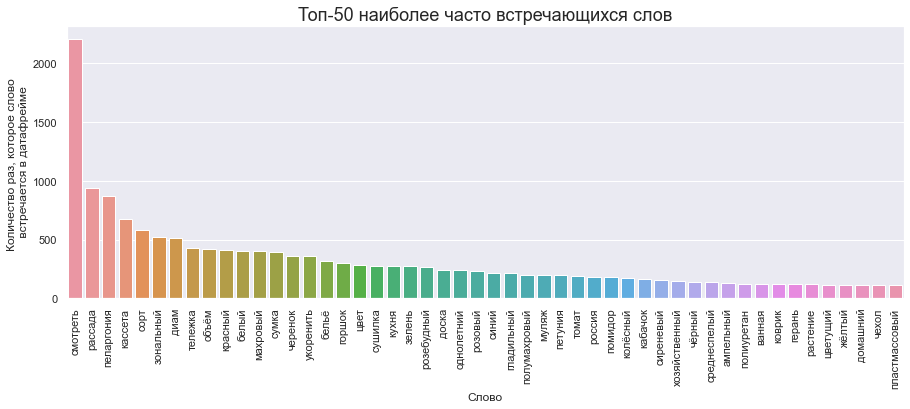

In [37]:
plt.figure(figsize=(15, 5))
plt.title('Топ-50 наиболее часто встречающихся слов', size=18)
sns.barplot(data=category_counter[:50], x='key_word', y='amount')
plt.xlabel('Слово')
plt.ylabel('Количество раз, которое слово \n встречается в датафрейме')
plt.xticks(rotation=90);

In [38]:
##Модуль с категориями, встречающихся в датафрейме больше 10 раз для формирования словарей из категорий
# category_counter[category_counter['amount'] >= 10]['key_word'].unique()

In [39]:
# Формирование словарей для категорий
plants = ['пеларгония','ампельный', 'герань', 'растение', 'цветущий','калибрахоа', 'бакоп', 'фуксия', 'вербена','лобелия', 
         'эвкалипт', 'флокс', 'бегония', 'фиалка', 'гунни', 'цикламен', 'циперус', 'чашелист', 'зумул', 'гибридный', 
          'прожилка', 'новогодний', 'плющелистный', 'колокольчик', 'бальзамин', 'регатта', 'овощной', 'душистый', 
          'новогвинейский', 'мединилла', 'радермахер', 'шеффлера', 'хризолидокарпус', 'эхеверие', 'декабрист', 'горшок',
         'каллуна', 'индетерминантный', 'калла', 'азалия', 'детерминантный', 'огонёк', 'комнатный', 'раннеспелый', 
          'фаленопсис', 'фикус', 'базилик', 'календула', 'аптения', 'томат', 'укроп', 'земляника', 'дыня', 'баклажан',
          'фиттония', 'вербейник', 'позднеспелый', 'душица', 'антуриум', 'георгин', 'осина', 'крассула', 'лаванда',
         'мимоза', 'спатифиллум', 'зверобой', 'роза', 'клубника', 'скиммия', 'альбук', 'гортензия', 'алоэ', 'цинния',
         'тимьян', 'ранункулус', 'диффенбахий', 'подсолнечник', 'суккулента',  'хризантема', 'гиацинт', 'полынь', 'петуния',
         'салат', 'примула', 'физостегия', 'тюльпан', 'дендробиум', 'арбуз', 'нобилиса', 'лавр', 'ромашка', 'вероника',
         'алиссума', 'крупноцветковый', 'лапчатка', 'бузульник', 'каланхий', 'морковь', 'смолёвка']
garden = ['укоренить', 'черенок', 'скарлета', 'мультиблум', 'рассада', 'кассета']
house = ['штора', 'каркас', 'придверный', 'оцинковать', 'ступенчатый', 'карниз', 'насадка', 'термометр', 'лестница', 
         'жаккарда', 'коврик', 'пуансеттие', 'резина', 'обувь', 'минеральный', 'эссенция', 'перчатка', 'встроить', 'весы',
        'шпингалет', 'стремянка', 'штангенциркуль', 'электрический', 'шпагат', 'скребок', 'сварка', 'напильник', 
        'строительный', 'мусор', 'сверло', 'стяжка', 'окно', 'ткань', 'мебельный', 'верёвка']
bedroom = ['одеяло', 'простыня', 'подушка', 'плед', 'матрас', 'покрывало', 'спальня', 'наволочка', 'наматрасник']
kitchen = ['кухня', 'пищевой', 'тарелка', 'скатерть', 'нержавеющий', 'салатник', 'салфетка', 'кружка', 'чайник', 'сковорода',
          'десертный', 'обеденный', 'ложка', 'миксер', 'кухонный', 'вино', 'столовая', 'посуда', 'чайный', 'антипригарный',
          'суповой', 'полиэфир', 'стакан', 'нож', 'столовый', 'сахарница', 'фарфоровый', 'просеиватель', 'кастрюля',
           'противень', 'хлебница', 'толкушка', 'венчик', 'выпечка', 'блюдо', 'термос', 'дуршлаг', 'электроштопор',
          'миска', 'овощеварка', 'котёл', 'салфетница', 'бокал', 'блюдце', 'мантоварка', 'соковарка', 'фужер', 'шампанское']
bathroom = ['ванная', 'коврик', 'ванна', 'душа', 'полотенце', 'унитазный', 'полиамидный','сидение', 'мыло', 'средство',
           'зубной', 'крем', 'халат']
cleaning = ['сушилка', 'доска', 'гладильный', 'щётка', 'потолочно', 'бельё', 'швабра', 'мытьё', 'утюг', 'стиральный','ёрш',
            'телескопический', 'подрукавник', 'бэлля', 'тряпкодержатель', 'пылесос ', 'глажение', 'веник', 'прищепка',
            'губка', 'посудомоечный', 'вантуз', 'тряпка', 'урна']
storage = ['вешалка', 'чехол', 'одежда', 'плечики', 'крючок', 'хранение', 'подкладка', 'войлок', 'перекладина', 'костюм',
          'полка', 'комод', 'обувь',  'обувница ']
containers = ['корзина', 'банк', 'контейнер', 'полимербыт', 'ведро', 'ротанг', 'коробка', 'эльфпласт', 'таз', 
              'короб', 'лоток', 'кувшин', 'бидон', 'ёмкость', 'ящик']
bags = ['тележка', 'сумка', 'колёсный', 'багажный', 'комбинированный', 'складный']
moulage = ['муляж', 'искусственный', 'композиция', 'декоративный', 'крокус', 'чили', 'одиночный']

In [40]:
# #Блок для проверки слова: исключить возможность дублирования слова в других категориях
# df[df['product_word'].str.lower().str.contains("одеяло", case=False, na=False)]

Создадим функцию для присвоения категории каждому товару.

In [41]:
df['category'] = 0
def category(word_list, category_name):
    '''
    category - функция для присвоения категории каждому товару:
        word_list - название словаря;
        category_name - название категории
    '''
    join = '|'.join(word_list)
    index = df[df['product_word'].str.lower().str.contains(join)].index.to_list()
    for i in index:
        df.loc[i, 'category'] = category_name

In [42]:
# Присвоим категории товарам в нашем датафрейме
category(plants, 'Растения')
category(garden, 'Черенки и рассада')
category(house, 'Товары для дома')
category(bedroom, 'Спальные товары')
category(kitchen, 'Кухонные товары')
category(bathroom, 'Товары для ванной')
category(cleaning, 'Хозяйственные товары')
category(storage, 'Товары для хранения')
category(containers, 'Ёмкости')
category(bags, 'Сумки и тележки')
category(moulage, 'Бутафория')

In [43]:
%%time
df.loc[df['category'] == 0, 'category'] = 'Прочее'

Wall time: 2.02 ms


Сгруппируем данные по категориям и найдем процент товаров из общего количества в каждой полученной категории по очищенным данным.

In [44]:
df_filtered = df[df['customer_id'].isin(df_filtered['customer_id'])]

In [45]:
grouped_category = df_filtered.groupby('category').agg({'product':'count', 'total_price':'sum'})\
.reset_index().rename(columns={'product':'cnt_products', 'total_price':'revenue'})
grouped_category['percent_of_products'] = (grouped_category['cnt_products'] / len(df))
grouped_category = grouped_category.sort_values(by='percent_of_products', ascending = False)
grouped_category['percent_of_products'] = grouped_category['percent_of_products'].map('{:.2%}'.format)
grouped_category

category  cnt_products   revenue percent_of_products
4               Растения          1303  294656.0              22.58%
11     Черенки и рассада           826  132392.0              14.31%
2        Кухонные товары           569  281921.0               9.86%
10  Хозяйственные товары           461  601642.0               7.99%
6        Сумки и тележки           342  640998.0               5.93%
1              Бутафория           312  111220.0               5.41%
7      Товары для ванной           267  264105.0               4.63%
3                 Прочее           261  140506.0               4.52%
9    Товары для хранения           217  235760.0               3.76%
0                Ёмкости           203  156548.0               3.52%
8        Товары для дома           133  149927.0               2.30%
5        Спальные товары            14   25953.0               0.24%

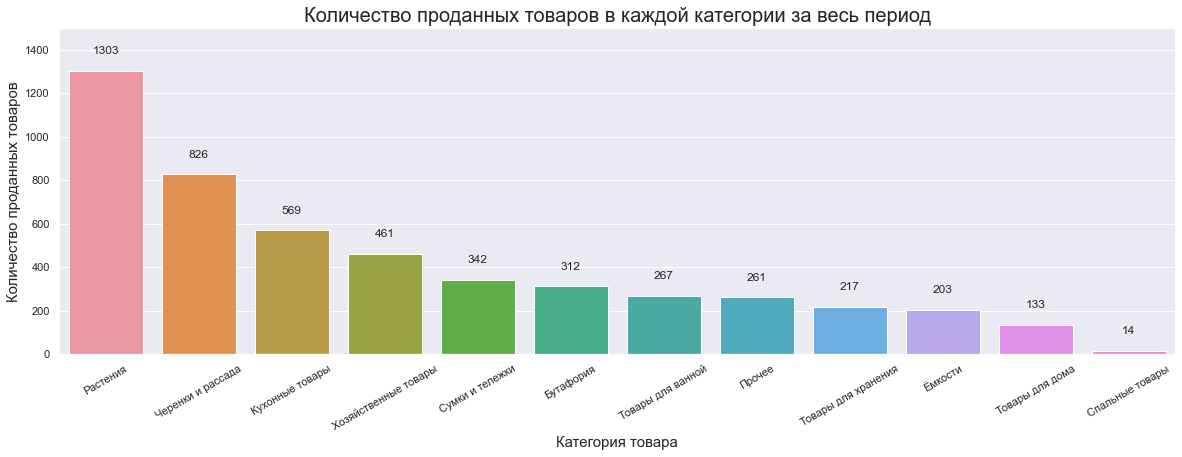

In [46]:
plt.figure(figsize=(20,6))
plt.title('Количество проданных товаров в каждой категории за весь период', size=20)
ax = sns.barplot(y=grouped_category['cnt_products'], 
                 x=grouped_category['category'])
for p in ax.patches:
        ax.annotate (str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
plt.xlabel('Категория товара', size=15)
plt.ylabel('Количество проданных товаров', size=15)
plt.xticks(rotation=30)
plt.ylim(None, 1500)
plt.show()

Из графика видим, что наибольшим спросом пользуются товары из категории "Растения" (1303 проданных шт.), "Черенки и рассада" (826 шт.), а также "Кухонные товары" (596 шт.). Самыми непопулярными оказались товары из группы "Спальные принадлежности" - всего в данной категории было продано 14 шт.

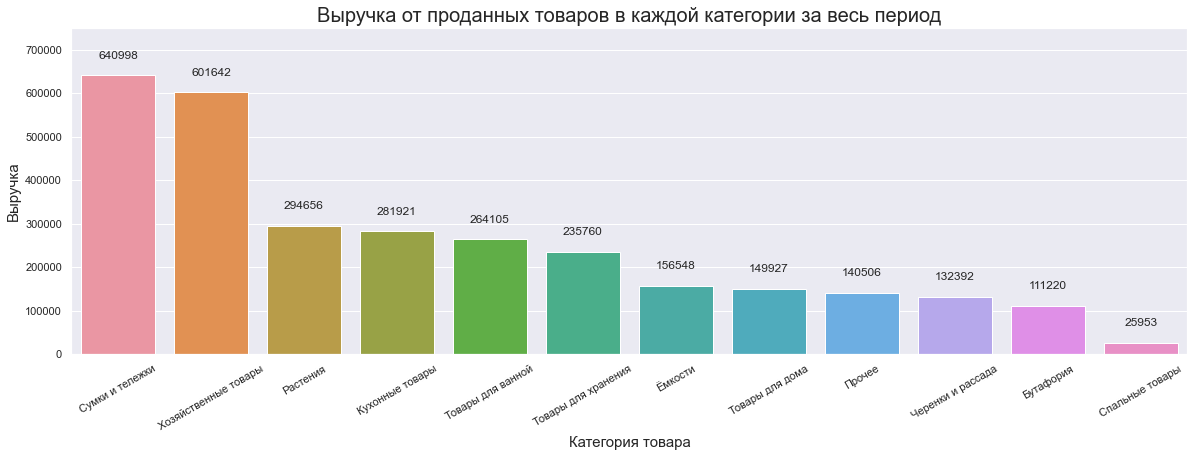

In [47]:
grouped_category = grouped_category.sort_values(by='revenue', ascending = False)
plt.figure(figsize=(20,6))
plt.title('Выручка от проданных товаров в каждой категории за весь период', size=20)
ax = sns.barplot(y=grouped_category['revenue'], 
                 x=grouped_category['category'])
for p in ax.patches:
        ax.annotate (str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
plt.xlabel('Категория товара', size=15)
plt.ylabel('Выручка', size=15)
plt.xticks(rotation=30)
plt.ylim(None, 0.75e6)
plt.show()

При этом бОльшую выручку принесли товары из категорий: "Сумки и тележки" (640 тыс. у.е.), "Хозяйственные товары" (601 тыс. у.е.) и "Растения" (295. тыс. у.е.). "Спальные товары" все также на последнем месте и по выручке - 26 тыс. у.е.

In [48]:
category_month = df_filtered.groupby(['category', 'month'])\
.agg({'customer_id':'nunique', 'price':'mean', 'total_price':'sum'})\
.reset_index().rename(columns={'customer_id':'cnt_buyers', 'avg_price':'mean', 'total_price':'revenue'})

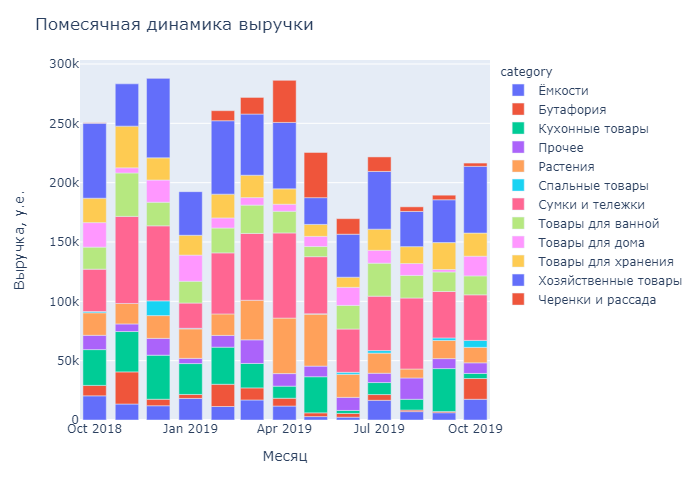

In [49]:
fig = px.bar(category_month, x='month', y='revenue', color='category')
fig.update_layout(
    title='Помесячная динамика выручки',
    xaxis_title='Месяц',
    yaxis_title='Выручка, у.е.')
fig.show() 

fig.write_image("images/barplot.png")
img_bytes = fig.to_image(format="png")
Image(img_bytes) 

По графику динамики выручки по месяцам видим, что стабильнее всего себя показывает выручка для категории товаров "Хозяйственные товары" и "Сумки и тележки". По графику также можем сказать, что для данных характерна некоторая сезонность, товары из категории "Черенки и рассада" начинают скупать ближе к весне -  в феврале месяце, а с октября по январь большей популярностью пользуются товары для дома.

#### Провеcти кластеризацию клиентов

* Нарисовать дендрограмму
* Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов
* Посчитать процент покупателей в кластерах с товарами различных категорий

In [50]:
df_clust_copy = df_filtered.copy(deep=True)
df_clust_copy.loc[:, 'test_column'] = 1
df_clust = df_clust_copy.pivot_table(index = 'customer_id', columns = 'category', values='test_column', aggfunc='mean')\
.reset_index().fillna(0)

Разделим наши данные на признаки (матрица X) и целевую переменную (y).

In [51]:
X = df_clust.drop('customer_id', axis=1)
y = df_clust['customer_id']

Разделяем модель на обучающую и валидационную выборку.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = RANDOM_SEED)

In [53]:
# стандартизация данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#Построение матрицы расстояний
linked = linkage(X_sc, method = 'ward')

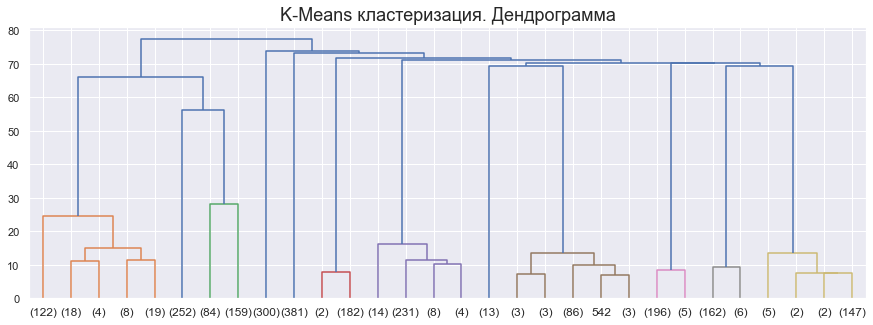

In [54]:
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
plt.figure(figsize=(15, 5))  
dendrogram(linked, orientation='top',
           truncate_mode='lastp',  # show only the last p merged clusters
           p=30,  # show only the last p merged clusters
           leaf_rotation=0,
           leaf_font_size=12)     
plt.title('K-Means кластеризация. Дендрограмма', size=18)
plt.show() 

Исходя из дендограммы выделим 12 кластеров: столько же, сколько категорий товаров.

In [55]:
km = KMeans(n_clusters = 12, random_state=RANDOM_SEED, n_jobs=1) # задаём число кластеров, равное 12
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [56]:
# сохраняем метки кластера в поле нашего датасета
df_clust['cluster_km'] = labels

In [57]:
clusters = df_clust.groupby('cluster_km').mean().T.iloc[:12]

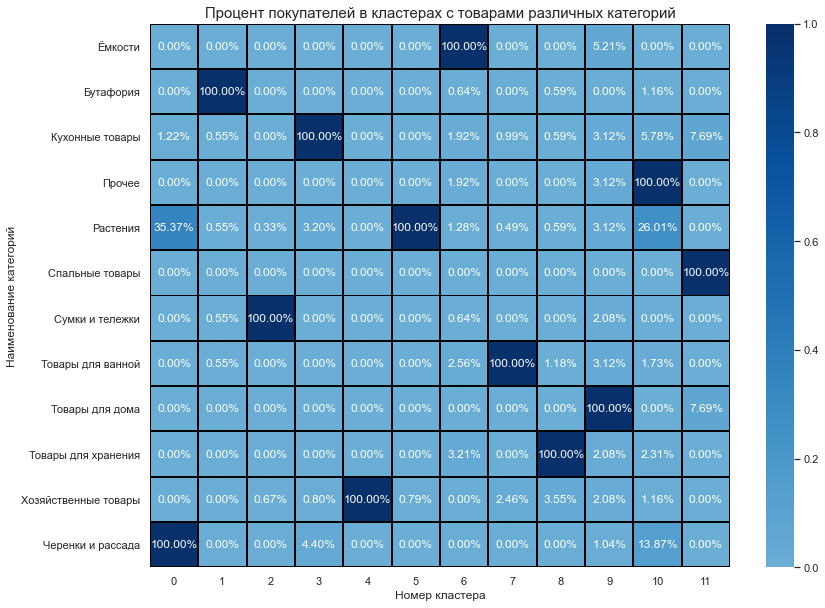

In [58]:
plt.figure(figsize = (13, 10))
plt.title('Процент покупателей в кластерах с товарами различных категорий', size = 15)
sns_plot = sns.heatmap(clusters, annot=True, fmt='.2%', 
                      linewidth=1, linecolor='black', vmax=1, center=0, cmap='Blues')
fig = sns_plot.get_figure()
plt.xlabel('Номер кластера')
plt.ylabel('Наименование категорий')
plt.show()

По графику видим, что для каждого кластера характерна определенная категория товаров. Присвоим каждему кластеру свою категорию товаров.

In [59]:
cluster_cat = pd.DataFrame()
categories = ['Черенки и рассада', 'Бутафория', 'Сумки и тележки', 'Кухонные товары', 'Хозяйственные товары',  'Растения',
              'Ёмкости', 'Товары для ванной', 'Товары для хранения', 'Товары для дома', 'Прочее', 'Спальные товары']
for i, category in zip(range(0,12), categories):
    cluster_cat.loc[i, 'category'] = category
cluster_cat = cluster_cat.reset_index()
cluster_cat.columns = ['cluster_km', 'category']
cluster_cat

cluster_km              category
0            0     Черенки и рассада
1            1             Бутафория
2            2       Сумки и тележки
3            3       Кухонные товары
4            4  Хозяйственные товары
5            5              Растения
6            6               Ёмкости
7            7     Товары для ванной
8            8   Товары для хранения
9            9       Товары для дома
10          10                Прочее
11          11       Спальные товары

Получили 12 кластеров, для каждого из которых характерна определенная категория товаров, что означает каждый из покупателей  одного кластера хотя бы один раз купил данную категорию товара. Для кластера 9 характерно то, что 35.7% покупателей товаров категории "Черенки и рассада" покупали также и категорию товаров "Растения".

#### Сравнить поведение покупателей из разных кластеров после сегментации

* Посчитать среднее количество заказов, среднее количество купленных товаров на одного покупателя, средний чек, суммарную выручку
* Выявить особенности каждого кластера, выявить наиболее перспективные сегменты

Соединим первоначальный очищенный первоначальный датафрейм с датафреймом с кластерами по столбцу `customer_id`.

In [60]:
df_filtered = df_filtered.merge(df_clust, left_on='customer_id', right_on='customer_id')

Сгруппируем получившуюся таблицу по кластерам и найдем метрики: среднее количество заказов, среднее количество купленных товаров на одного покупателя, средний чек, суммарную выручку.

In [61]:
orders_filt_clust = df_filtered.groupby('cluster_km')\
.agg({'customer_id':'nunique', 'order_id':'nunique', 'product':'count', 'quantity':'sum', 'price':'mean', 
      'total_price':'sum'})\
.reset_index().rename(columns={'customer_id':'n_buyers', 'order_id':'cnt_orders', 'product':'cnt_products_in_order', 
                               'quantity':'cnt_goods_in_order','price':'avg_price','total_price':'revenue'})

In [62]:
orders_filt_clust['avg_orders_per_buyer'] = round(orders_filt_clust['cnt_orders']/orders_filt_clust['n_buyers'],0)
orders_filt_clust['avg_bill'] = orders_filt_clust['revenue'] / orders_filt_clust['cnt_orders']
orders_filt_clust['avg_goods_per_buyer'] = round(orders_filt_clust['cnt_goods_in_order'] / orders_filt_clust['n_buyers'], 0)

Построим графики получившихся метрик.

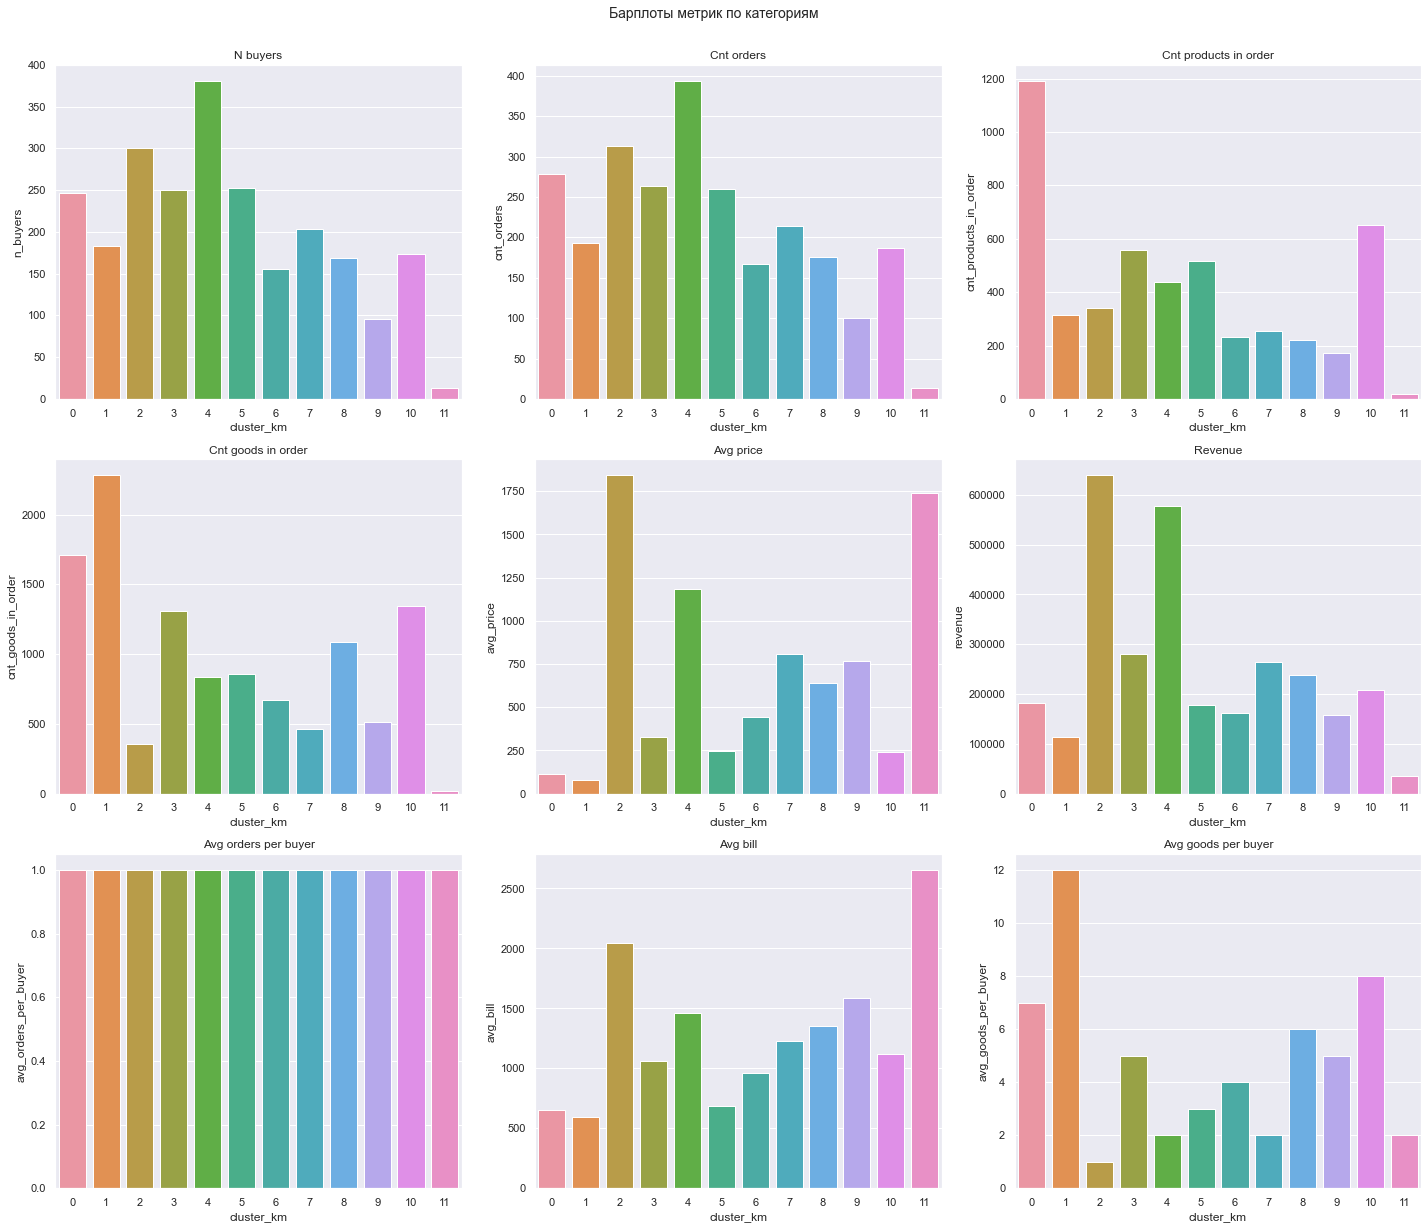

In [63]:
WIDTH = 3
plot_amount = len(orders_filt_clust.columns)
height = plot_amount//WIDTH

fig, axs = plt.subplots(height, WIDTH, figsize=(20, 17))
fig.suptitle('Барплоты метрик по категориям',  y=1.003, size=14)

for item, ax in zip(orders_filt_clust.columns[1:], np.ravel(axs)):
    sns.barplot(data = orders_filt_clust, x='cluster_km', y=item, ax=ax)
    ax.set_title(item.capitalize().replace('_', ' '), size=12)

plt.tight_layout()
plt.show()

Логика выделения наиболее перспективных кластеров следующая: поскольку одна из основных метрик успешности продукта - суммарная выручка от его продажи, мы будем брать данную метрику за ориентир. 

* **Кластер 2 "Сумки и тележки"** характеризуется наибольшей выручкой - 639 тыс. у.е. и наибольшей средней ценой товара 1842 у.е. При этом количество покупателей 300 чел., количество заказов (313 шт.), количество купленных товаров 353 шт, средний чек  2042 у.е. и среднее количество купленных товаров на покупателя - 1, уступают остальным кластерам.

* **Кластер 3 "Кухонные товары"** характеризуется выручкой 639 тыс. у.е., количеством покупателей - 250 чел, количеством заказов 263 шт., количеством товаров в покупке 1309 шт. и количеством уникальных товаров в покупке 556 шт., средней ценой 327 у.е., средним чеком 1065 у.е. и средним количеством товаров на покупателя 5 шт. 

* **Кластер 4 "Хозяйственные товары"** характеризуется наибольшим количеством покупателей - 381 чел. и наибольшим количеством заказов 394 шт. При этом количество товаров в заказе (835 шт.), средняя цена товара (1187 у.е.), общая выручка (577 тыс. у.е.), средний чек (1465 у.е.) и среднее количество купленных товаров на покупателя (2 шт.) уступают остальным кластерам по показателям.

* **Кластер 0 "Черенки и рассада"** характеризуется наибольшим количеством продуктов в заказе 1192 шт., среднее количество заказов на покупателя - 2 шт. При этом количество покупателей - 246 чел., количество ззаказов 279 шт., средняя цена - 114 у.е., среднее количество заказов на покупателя - 1 шт. , средний чек 655 у.е., среднее количество товаров на покупателя 7 шт. Кластер 0 и кластер 5 "Растения" имеют примерно одинаковую выручку 

* **Кластер 5 "Растения"** характеризуется выручкой 178 тыс у.е., схожей с выручкой от продаж категории "Черенки и рассада", количеством покупателей 252 чел., количеством заказов - 260 шт., количеством купленных товаров 857 шт., средней ценой 249 у.е. , средним чеком 682 у.е. и средним колитчеством проданной продукции на покупателя 3 шт.

По всем кластерам наблюдается 1 заказ на 1 человека.

Кластер 2, 3 и 4 мы выделили как наиболее перспективные по выручке, кластер 0 и кластер 5 выглядят наиболее перспективными за счет того, что во-первых, они схожи по выручке, во-вторых 35% тех, кто купил товары из категории "Черенки и рассада" купил также категорию товаров "Растения". Можно предположить, что это комплементарные товары и в данном случае хорошо сработает стратегия: предлагать клиентам, покупающих растения также и категорию товаров "Черенки и рассада" и наоборот, что скорее всего позволит увеличить продажи, а соответственно и выручку данных категорий товаров.

Кластер "Прочее" мы не будем рассматривать, так как в него попали товары из разных категорий, поскольку ключевые слова из названий данных товаров встречались в датафрейме реже остальных.

### TF-IDF эксперимент

Попробуем кластеризовать наш датафрейм, используя tf-idf меру для оценки важности слова в каждой строке из столбца `product_word`.

In [64]:
df_tf_idf = df.copy(deep=True) 

In [65]:
#Преобразуем столбец product_word в вектор
tfidf_vectorizer = TfidfVectorizer()
tfidf_result = tfidf_vectorizer.fit_transform(df_tf_idf['product_word'])

In [66]:
# Понизим размерность данных методом PCA (методом главных компонент)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(tfidf_result.toarray())

In [67]:
# Применим алгоритм к данным и поделим датафрейм на 10 кластеров
cluster_labels = KMeans(n_clusters=10, random_state=RANDOM_SEED, n_jobs=1).fit_predict(data_reduced)

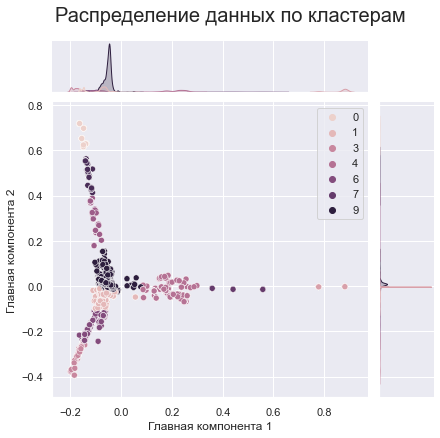

In [68]:
ax = sns.jointplot(x=data_reduced[:, 0], 
              y=data_reduced[:, 1], 
              hue=cluster_labels)
ax.fig.suptitle('Распределение данных по кластерам', size=20)
ax.fig.subplots_adjust(top=0.9)
ax.set_axis_labels('Главная компонента 1', 'Главная компонента 2', fontsize=12)
plt.show()

Поскольку компоненты PCA не имеют под собой экономического смысла, обозначим их как главная компонента 1 и главная компонента 2. Данные признаки являются проекцией многомерного пространства на плоскость с максимизацией сохраненной дисперсии первичного распределения.

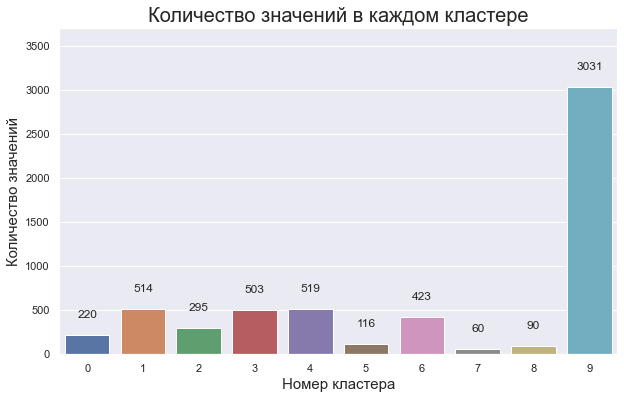

In [69]:
grouped_category = grouped_category.sort_values(by='revenue', ascending = False)
plt.figure(figsize=(10,6))
plt.title('Количество значений в каждом кластере', size=20)
ax = sns.countplot(x=cluster_labels);
for p in ax.patches:
        ax.annotate (str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
plt.xlabel('Номер кластера', size=15)
plt.ylabel('Количество значений', size=15)
plt.ylim(None, 3700)
plt.show()

По количеству значений очень выделяется девятый кластер, в него попало много товаров, в то время как остальные кластеры сильно отстают по всем показателям.

In [70]:
df_tf_idf['pca_kmean'] = cluster_labels
df_tf_idf_pca = df_tf_idf.groupby('pca_kmean').agg({'quantity':'sum', 'price':'sum'}).reset_index()\
.rename(columns={'price':'revenue'})
df_tf_idf_pca

pca_kmean  quantity    revenue
0          0       221   427696.0
1          1      1617    78641.0
2          2       359    39035.0
3          3       655    71269.0
4          4       665    84435.0
5          5       175    85423.0
6          6       620    44417.0
7          7        68     5543.0
8          8        91   279827.0
9          9     11063  1755418.0

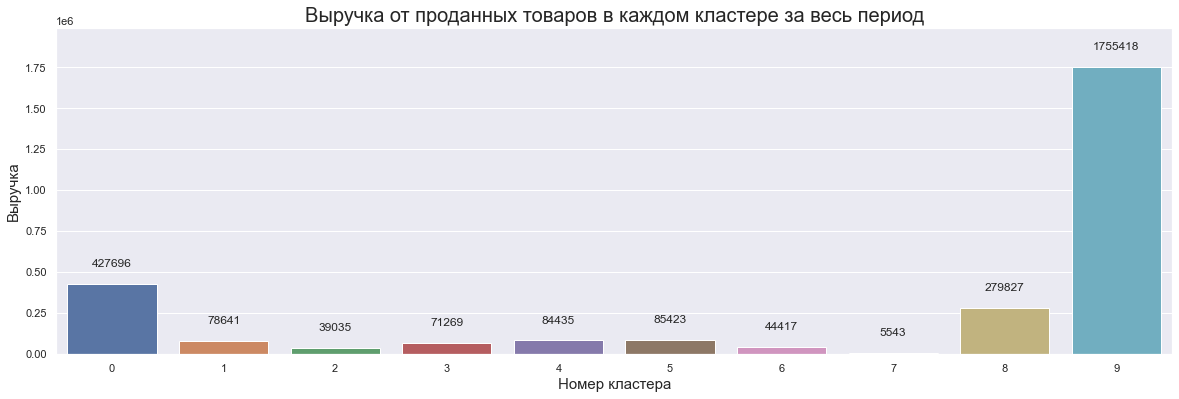

In [71]:
plt.figure(figsize=(20,6))
plt.title('Выручка от проданных товаров в каждом кластере за весь период', size=20)
ax = sns.barplot(y=df_tf_idf_pca['revenue'], 
                 x=df_tf_idf_pca['pca_kmean'])
for p in ax.patches:
        ax.annotate (str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
plt.xlabel('Номер кластера', size=15)
plt.ylabel('Выручка', size=15)
plt.ylim(None, 1.99e6)
plt.show()

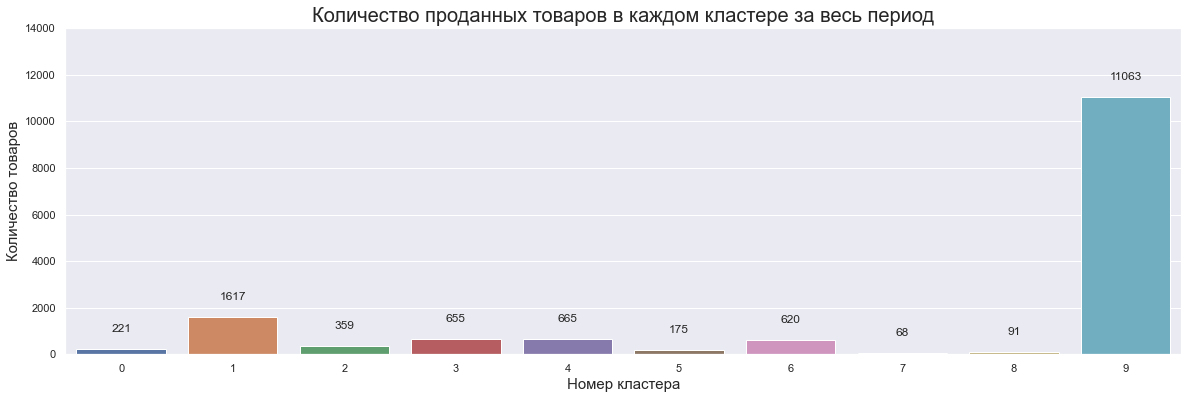

In [72]:
plt.figure(figsize=(20,6))
plt.title('Количество проданных товаров в каждом кластере за весь период', size=20)
ax = sns.barplot(y=df_tf_idf_pca['quantity'], 
                 x=df_tf_idf_pca['pca_kmean'])
for p in ax.patches:
        ax.annotate (str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')
plt.xlabel('Номер кластера', size=15)
plt.ylabel('Количество товаров', size=15)
plt.ylim(None, 14000)
plt.show()

То же самое касается выручки и количества проданных товаров. Из-за большого размера девятого кластера, данные распределены с явным перекосом, что делает невозможным дальнейший анализ данных. Из этого можно сделать вывод, что разделение на кластеры данным способом некорректно и для дальнейшей оценки стоит придерживаться способа из предыдущего шага.

### Проверка статистических гипотез

* Сформулировать гипотезы
* Выделить 5 наиболее перспективных кластеров и посчитать статистическую значимость различий в среднем чеке заказа между группами

<div style="border:solid #eaeaea 2px; padding: 15px">
Нулевая гипотеза H0 - значимые различия между сравниваемыми выборками отсутствуют
    
Альтернативная гипотеза H1 - значимые различия между сравниваемыми выборками есть 

Критический уровень статистической значимости: 
Alpha = 0.05
В дальнейшем мы будем корректировать критический уровень статистической значимости используя поправку Шидака для случая множественной проверки гипотез. </div>

Для большего удобства сгруппируем данные по кластерам и id пользователей для нахождения значимых различий в среднем чеке между выборками.

In [73]:
orders = df_filtered.groupby(['customer_id', 'cluster_km']).agg({'total_price':'sum'}).reset_index()\
                                                                                .rename(columns={'total_price':'revenue'})

In [74]:
#Создадим лист с парами групп, для которых необходимо провести Тест Манна-Уитни
test_pairs_list = list(itertools.combinations([0, 2, 3, 4, 5], 2))
print(test_pairs_list)

[(0, 2), (0, 3), (0, 4), (0, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


In [75]:
p_data = []
for pair_names in test_pairs_list:
    group1 = pair_names[0]
    group2 = pair_names[1]
    pvals = (stats.mannwhitneyu(orders[orders['cluster_km']==group1]['revenue'], 
                                orders[orders['cluster_km']==group2]['revenue'], alternative='two-sided')[1])
    p_data.append(pvals)
    multitest_result = multipletests(p_data, 0.05, method='sidak')

In [76]:
for pair_names, test_status, corrected_p in zip(test_pairs_list, multitest_result[0], multitest_result[1]):
    print('Пара кластеров', pair_names)
    print('alpha с поправкой Шидака: ', multitest_result[2])
    if test_status:
        print(color.GREEN + 'Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.' + color.END)
    else:
        print(color.RED + \
              'Не получилось отвергнуть нулевую гипотезу, значимые различия между сравниваемыми выборками отсутствуют.' + \
              color.END) 
    print('p-значение после корректировки: ', corrected_p)  
    print('Относительные различия в среднем чеке между группами: {0:.3f}'\
   .format(orders[orders['cluster_km']==pair_names[0]]['revenue'].mean()/orders[orders['cluster_km']==pair_names[1]]['revenue']\
           .mean()-1))
    print()
    

Пара кластеров (0, 2)
alpha с поправкой Шидака:  0.005116196891823743
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение после корректировки:  0.0
Относительные различия в среднем чеке между группами: -0.651

Пара кластеров (0, 3)
alpha с поправкой Шидака:  0.005116196891823743
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение после корректировки:  8.993739941676182e-08
Относительные различия в среднем чеке между группами: -0.337

Пара кластеров (0, 4)
alpha с поправкой Шидака:  0.005116196891823743
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение после корректировки:  0.0
Относительные различия в среднем чеке между группами: -0.509

Пара кластеров (0, 5)
alpha с поправкой Шидака:  0.005116196891823743
Не получилось отвергнуть нулевую гипотезу, значимые различия между сравниваемыми выборками отсутствуют.
p-значение после корректировки:  0.4956981832554773
Отн

В результате проведения теста Манна-Уитни получили, что почти между всеми парами перспективных кластеров нулевые гипотезы отверглись, что означает: значимые различия в среднем чеке между сравниваемыми выборками есть, кроме пары кластеров 0 и 5 - "Черенки и рассада" и "Растения". Данное обстоятельство подтверждает наше предположение о комплементарности данных видов товаров. Они приносят примерно равную прибыль, их довольно часто покупают вместе, значимые различия между сравниваемыми выборками отсутствуют, а значит увеличивая продажи от одного вида товаров, например, "Черенки и рассада" мы можем повысить продажи "Растений" и наоборот. Данные категории было бы некорректно объединять, потому что черенки и рассаду покупают для дальнейшего высаживания, а растения сами по себе уже готовый продукт. К тому же, это привело бы к сильному перекосу наших выборок.

## Выводы

* Минимальное количество купленных товаров одним клиентом - 1 шт., а максимальное - 1000 единиц продукции на одного покупателя за весь рассматриваемый промежуток времени. Минимальная цена за товар - 9 у.е., максимальная - 14 917. Наибольшей популярностью пользуется товар "рассада кабачка сорт зебра кассета 6 шт e6", его купили 79 раз за рассматриваемый период.


* В датасете представлены данные с 01.10.2018 по 31.10.2019.



* Общее количество уникальных покупателей: 2451
* Общее количество уникальных товаров: 2341
* Количество уникальных заказов: 2784



* За рассматриваемый период времени в данных превалируют покупатели, совершившие разовые покупки. В заказах в основном наблюдаются 1-3 покупки. Cредняя выручка с одного покупателя составляет 734 у.е., а средняя сумма заказа - 712 у.е. Средний чек по всем покупателям составляет 712 у.е.


* Не более 5% пользователей совершили больше двух заказов и не более 1% больше трех заказов. Граница аномальных значений проходит в диапазоне свыше 3 х покупок.
* Не более 5% пользователей совершили покупки дороже 4768 у.е. и не более 1% дороже 12122.5 у.е. Пусть граница аномальных значений проходит в диапазоне свыше 12122.5 у.е.


* Количество покупателей с аномально большой выручкой: 25
* Количество покупателей с аномально большим количеством заказов: 8


* Пиковые точки выручки приходится на ноябрь 2018 -283 тыс. у.е., декабрь 2018 - 288 тыс. у.е. и апрель 2019 года - 286 тыс. у.е. Выраженной сезонности не наблюдается. То же касается и динамики количества покупателей по месяцам. Пиковые точки - декабрь 2018 (237 уникальных покупателей), февраль 2019 (246 уникальных покупателей) и апрель 2019 (235 уникальных покупателей). Видим, что количество покупателей сильно варьируется от месяца к месяцу.


* Разделили все товары на 12 категорий. Наибольшим спросом пользуются товары из категории "Растения" (1303 проданных шт.), "Черенки и рассада" (826 шт.), а также "Кухонные товары" (596 шт.). Самыми непопулярными оказались товары из группы "Спальные принадлежности" - всего в данной категории было продано 14 шт. При этом бОльшую выручку принесли товары из категорий: "Сумки и тележки" (640 тыс. у.е.), "Хозяйственные товары" (601 тыс. у.е.) и "Растения" (295. тыс. у.е.). "Спальные товары" все также на последнем месте и по выручке - 26 тыс. у.е.


* Стабильнее всего себя показывает выручка для категории товаров "Хозяйственные товары" и "Сумки и тележки". Для данных характерна некоторая сезонность, товары из категории "Черенки и рассада" начинают скупать ближе к весне - в феврале месяце, а с октября по январь большей популярностью пользуются товары для дома.


* Разделили данные на 12 кластеров - столько же, сколько категорий товаров, для каждого из которых характерна определенная категория товаров, что означает каждый из покупателей одного кластера хотя бы один раз купил данную категорию товара. Для кластера 9 характерно то, что 35.7% покупателей товаров категории "Черенки и рассада" покупали также и категорию товаров "Растения".

***Наиболее перспективные кластеры:***

* **Кластер 2 "Сумки и тележки"** характеризуется наибольшей выручкой - 639 тыс. у.е. и наибольшей средней ценой товара 1842 у.е. При этом количество покупателей 300 чел., количество заказов (313 шт.), количество купленных товаров 353 шт, средний чек 2042 у.е. и среднее количество купленных товаров на покупателя - 1, уступают остальным кластерам.

* **Кластер 3 "Кухонные товары"** характеризуется выручкой 639 тыс. у.е., количеством покупателей - 250 чел, количеством заказов 263 шт., количеством товаров в покупке 1309 шт. и количеством уникальных товаров в покупке 556 шт., средней ценой 327 у.е., средним чеком 1065 у.е. и средним количеством товаров на покупателя 5 шт.

* **Кластер 4 "Хозяйственные товары"** характеризуется наибольшим количеством покупателей - 381 чел. и наибольшим количеством заказов 394 шт. При этом количество товаров в заказе (835 шт.), средняя цена товара (1187 у.е.), общая выручка (577 тыс. у.е.), средний чек (1465 у.е.) и среднее количество купленных товаров на покупателя (2 шт.) уступают остальным кластерам по показателям.

* **Кластер 0 "Черенки и рассада"** характеризуется наибольшим количеством продуктов в заказе 1192 шт., среднее количество заказов на покупателя - 2 шт. При этом количество покупателей - 246 чел., количество ззаказов 279 шт., средняя цена - 114 у.е., среднее количество заказов на покупателя - 1 шт. , средний чек 655 у.е., среднее количество товаров на покупателя 7 шт. Кластер 0 и кластер 5 "Растения" имеют примерно одинаковую выручку

* **Кластер 5 "Растения"** характеризуется выручкой 178 тыс у.е., схожей с выручкой от продаж категории "Черенки и рассада", количеством покупателей 252 чел., количеством заказов - 260 шт., количеством купленных товаров 857 шт., средней ценой 249 у.е. , средним чеком 682 у.е. и средним колитчеством проданной продукции на покупателя 3 шт.

* По всем кластерам наблюдается 1 заказ на 1 человека.

* Кластер 2, 3 и 4 мы выделили как наиболее перспективные по выручке, кластер 0 и кластер 5 выглядят наиболее перспективными за счет того, что во-первых, они схожи по выручке, во-вторых 35% тех, кто купил товары из категории "Черенки и рассада" купил также категорию товаров "Растения". Можно предположить, что это комплементарные товары и в данном случае хорошо сработает стратегия: предлагать клиентам, покупающих растения также и категорию товаров "Черенки и рассада" и наоборот, что скорее всего позволит увеличить продажи, а соответственно и выручку данных категорий товаров.

* Кластер "Прочее" мы не стали рассматривать, так как в него попали товары из разных категорий, поскольку ключевые слова из названий данных товаров встречались в датафрейме реже остальных.



* Попытка кластеризовать датафрейм, используя tf-idf меру для оценки важности слова в каждой строке из столбца названий продуктов оказалась неуспешной, так как после кластеризации из-за большого размера девятого кластера, данные стали распределяться с явным перекосом, что сделало невозможным дальнейший анализ данных. Из этого можно сделать вывод, что разделение на кластеры данным способом некорректно и для дальнейшей оценки стоит придерживаться способа первоначальной кластеризации, отбирая ключевые слова для категорий вручную.



* В результате проведения теста Манна-Уитни получили, что почти между всеми парами перспективных кластеров нулевые гипотезы отверглись, что означает: значимые различия в среднем чеке между сравниваемыми выборками есть, кроме пары кластеров 0 и 5 - "Черенки и рассада" и "Растения". Данное обстоятельство подтверждает наше предположение о комплементарности данных видов товаров. Они приносят примерно равную прибыль, их довольно часто покупают вместе, значимые различия между сравниваемыми выборками отсутствуют, а значит увеличивая продажи от одного вида товаров, например, "Черенки и рассада" мы можем повысить продажи "Растений" и наоборот. Данные категории было бы некорректно объединять, потому что черенки и рассаду покупают для дальнейшего высаживания, а растения сами по себе уже готовый продукт. К тому же, это привело бы к сильному перекосу наших выборок.

**Рекомендации:**

* Можно устраивать акции для увеличения продаж в рамках покупателей товаров наиболее перспективных кластеров, рекомендовать в комплект к товару из покупаемой категории товар из той же категории

* Необходимо увеличить количество товаров в одном заказе и придумать программу лояльности, которая привлечет пользователя сделать еще один заказ, а в дальнейшем превратить пользователей в постоянных покупателей. Например, ввести карты лояльности с накоплением баллов

* Можно рекомендовать покупателям, приобретающим категории товаров "Растения" категорию товаров "Черенки и рассада" и наоборот.